## Project: Ford Bikes

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction
>  I have choosen theFord GoBikers, I will Focus on one main questions but each question willd derive more deeper questions
Q1- Compariosn between Male and Female Bikers 
you would think this is a stright forward answer but you will be amazed

# <a id='wrangling'></a>
## Data wrangling

In this section we will import our lib and create a data frame for our Data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
df = pd.read_csv('201902-fordgobike-tripdata.csv')

## Data Cleaning

We have a lot of Data are they all useful
From a quick View I found that we have some Redundant Data ex: (Station Id and Station Name) we only need one of them , Also i dont see a reason for the x, y corrandiants of the Stations but me can plot a nice map of our rides so lets kep it for now

In [28]:
# Removing unneeded columns and adding it to new Data frame df1
df1=df.drop(['start_station_name','end_station_name'],axis=1)
# those columns were dropped as they contained un valuble information to our specific questions
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,37.789625,-122.400811,13.0,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,37.791464,-122.391034,81.0,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,37.769305,-122.426826,3.0,37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,37.774836,-122.446546,70.0,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,37.804562,-122.271738,222.0,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


Remove Null Values (start_station_id,end_station_id,member_birth_year,member_gender)

In [29]:
df1.dropna(inplace= True)
# cant assume Station Ids or genders  so lets drop them

In [30]:
# lets assume this case study was made in 2020
# create a new column with the age instead of birth year
df1["age"]=2020 -df1.member_birth_year

In [31]:
# Dropping the birth Column
df1=df1.drop(['member_birth_year'],axis=1)

In [32]:
# This "other" needs to be reomeved as well
df1 = df1[df1.member_gender != "Other"]

In [33]:
# Creating a new column from the Start time to get the start hour
x=[]
for c in df1.start_time:
    x.append(int(c.split('-')[2].split(' ')[1].split(":")[0]))
# Adding the extracted season to the data frame    
df1["start_hour"]=x
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age,start_hour
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,37.789625,-122.400811,13.0,37.794231,-122.402923,4902,Customer,Male,No,36.0,17
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,37.769305,-122.426826,3.0,37.786375,-122.404904,5905,Customer,Male,No,48.0,12
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,37.804562,-122.271738,222.0,37.792714,-122.248780,4898,Subscriber,Male,Yes,46.0,23
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,37.770407,-122.391198,323.0,37.798014,-122.405950,5200,Subscriber,Male,No,61.0,23
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,37.317298,-121.884995,312.0,37.329732,-121.901782,3803,Subscriber,Female,No,37.0,23


In [34]:
# no Need for Start date and end Date now 
df1=df1.drop(['start_time','end_time'],axis=1)


# # Data Explanatory plots

Lets Start with some General plots to help take an overview of our Data

Text(0.5, 1.0, 'user types')

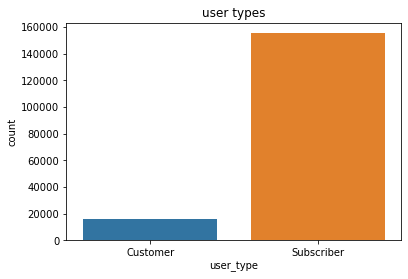

In [35]:
# Staring with user_type 
sb.countplot(data=df1, x='user_type');
plt.title("user types")

Most of our Riders are Subscribers almost 90% , wow that is Good foir bussines. What should be Done to increase the number of Subscribers more. Also what is the Ratio of Males and Females as Customers or Subscribers, More on that in the next Slides

Text(0.5, 1.0, 'Gender')

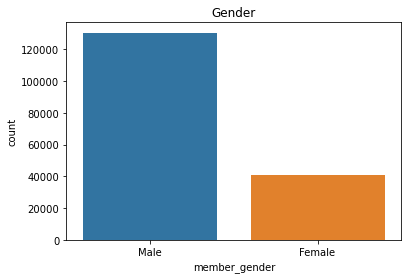

In [36]:
# member_gender 
sb.countplot(data=df1, x='member_gender');
plt.title("Gender")

Male are almost 3 times the Female , Are males mor active ! . Is the Data bias filled with Males than Females, I guess the problem is that our Sample is from only one Month in a single Year , more Data is Needed to calrify this Point. For Now Men enjoy biking than women

Text(0.5, 1.0, 'Bike Share ')

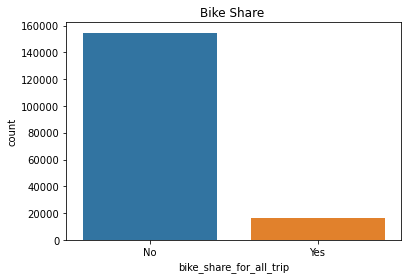

In [37]:
# bike_share_for_all_trip  
sb.countplot(data=df1, x='bike_share_for_all_trip');
plt.title("Bike Share ")

People with Bikes who share are almost negligable, Why do people almost never Share for all ride, is that mostly Common in Males or Females. Stay Tuned for the Shocking Answer 

Text(0.5, 1.0, 'Age')

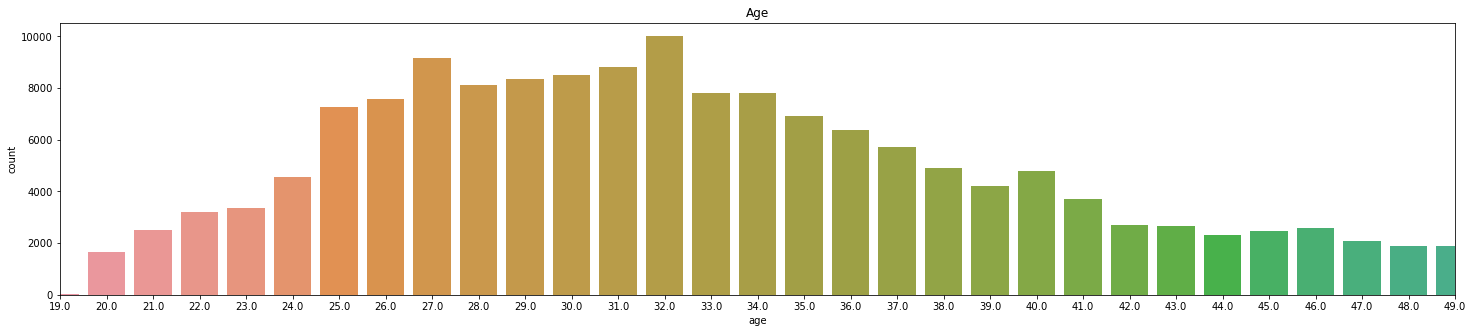

In [38]:
# age
plt.figure(figsize = [25,5])
sb.countplot(data=df1, x='age');
plt.xlim((0,30));
plt.title("Age")

As we can see we have our highest density from ages 24 till 36 , plot must be inhanced in explanatory Analysis. seems to be a bimodel though. 32 Years old seams to enjoy Bikes the Most. Marketing can target this range to increase profits

# Lets start our Comparision

Text(0.5, 1.0, 'Gender VS duration ')

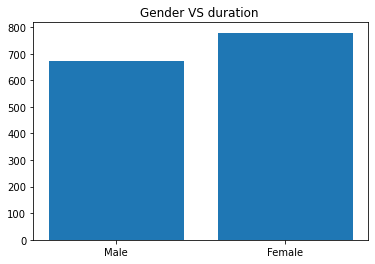

In [39]:
#Gender VS duration
Male_dur=df1.query("member_gender == 'Male'")['duration_sec'].mean()
Female_dur=df1.query("member_gender == 'Female'")['duration_sec'].mean()
x=["Male","Female"]
y=[Male_dur,Female_dur]
plt.bar(x,y)
plt.title("Gender VS duration ")

Female seems to have more stamina then men. Way to go Women.Although the Data set have More Men the Total duration for Females is slightly higher than Males. The Plot is very accurate as I took the mean number of Males and Females into considiration to avoid bias graphs. 

In [40]:
#Getting number of males and Females
m=df1.query("member_gender == 'Male'").count()[0]
f=df1.query("member_gender == 'Female'").count()[0]

In [41]:
# Gender Vs user Type
Male_cus=(df1.query("member_gender == 'Male' and user_type == 'Customer'").count()[0])
m_cus_p=(Male_cus/m)*100
Male_sub=(df1.query("member_gender == 'Male' and user_type == 'Subscriber'").count()[0])
m_sub_p=(Male_sub/m)*100
Female_cus = ((16116-Male_cus)/f)*100
Female_sub = ((155189-Male_sub)/f)*100
x=["Male","Female"]
y=[m_cus_p,Female_cus]




<BarContainer object of 2 artists>

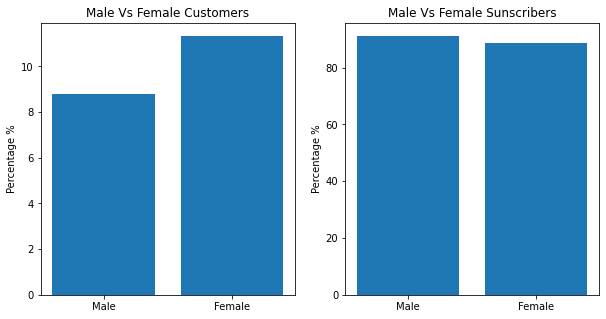

In [42]:
# Gender Vs User Types
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1) 
plt.bar(x,y)
plt.ylabel("Percentage %")
plt.title("Male Vs Female Customers")

plt.subplot(1, 2, 2) 
z=[m_sub_p,Female_sub]
plt.ylabel("Percentage %")
plt.title("Male Vs Female Sunscribers")
plt.bar(x,z)

We have more female customers than Males, for the subscribers the percentage is very close. Seems that Females like to try to be a customer First than Males. Maybe Males always goes with subcribtion as a first choice

Text(0.5, 1.0, 'Male Vs Female Age')

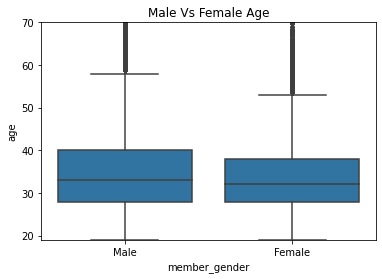

In [54]:
# Gender Vs age 
base_color = sb.color_palette()[0]
sb.boxplot(data=df1, x='member_gender', y='age', color=base_color)
plt.ylim((19,70));
plt.title("Male Vs Female Age")


We have more older males then females , the mean is very close though. This might explains why Females have more Duration in kike rides as they are younger. Old men seems to be more active than older Women !!!

Text(0.5, 1.0, 'Gender Vs Start Hour')

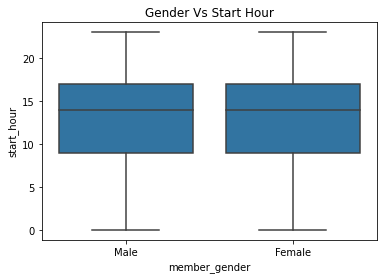

In [44]:
# Gender Vs Start Hour
base_color = sb.color_palette()[0]
sb.boxplot(data=df1, x='member_gender', y='start_hour', color=base_color)
plt.title("Gender Vs Start Hour")


The Starting hours of Males and Females are almost identical , Usefull insights 
1-No one bike after midnight
2-we dont have early bikes that start the run at sunshine 
3-Most of our riders enjoy the noon time for thier rides

Text(0.5, 1.0, 'Gender vs Start StationId')

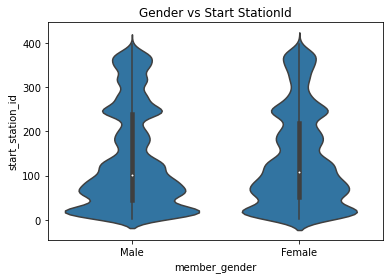

In [45]:
# Gender vs Station Id 
sb.violinplot(data=df1, x='member_gender', y='start_station_id', color=base_color, innner=None)
plt.title("Gender vs Start StationId")

The distribution of Male and female seems to be not equally distributed among Stations 
Stations Id below 150 have more ditributions than others, 
1-This could be due to lake of number of bikes in other stations
2-we need to focus on these stations ex: regular maintence than other stations

Text(0.5, 1.0, 'Gender vs End StationId')

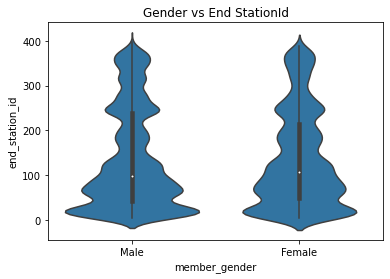

In [46]:
#Gender vs End StationId
sb.violinplot(data=df1, x='member_gender', y='end_station_id', color=base_color, innner=None)
plt.title("Gender vs End StationId")

End station id seems to be almost the same as the statrt station ids,
Stations Id below 150 have more ditributions than others.
1-This could be due to lake of number of parking spots in other stations or harder to reach , maybe on a hill (No one likes to bike all the way to a hill)
2-we need to focus on these stations ex: regular maintence than other stations

# lets see who is our winner with maximum duration per Ride (Male or Female??)

In [47]:
# lets see who is our winner with maximum duration per Ride (Male or Female??)
df1.duration_sec.max()
df1.query("duration_sec== 84548")['member_gender']

85465    Male
Name: member_gender, dtype: object

Lets Finalize with some Multi Variate Plots

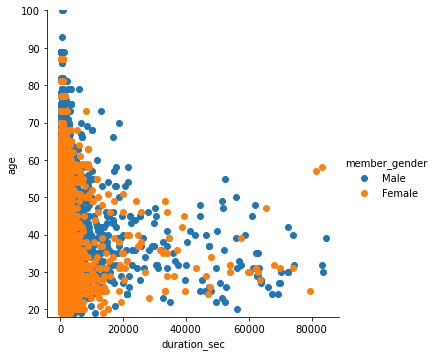

In [58]:
g = sb.FacetGrid(data = df1, hue = 'member_gender', size = 5)
g.map(plt.scatter, 'duration_sec', 'age')
g.add_legend()
plt.ylim((18,100));


This Plots help you grasp the realtion between the Age and duration for both Males and Females
-as age increase Duration decreases for both Males and Females 
-Also we can see that men has higher age than women
-Desity is Decreasing as Duration Increase

## Conclusion 


In General 
-We have more males bikers than Females
-We have more sumscribers than customers
-We almost have zero people who shares the rides
-we have our highest density from ages 24 till 36
More specific 
-Females have longer duration rides than Males
-Males have older people Bking than Females
-Males and Females prefer same time to take thier rides , most of them prefer it at noon or aliitle bit after that
-We have more Female customers than males and almost the same percentage in Subscribers
-Males and Females seems to perfer same Staions 
-Not all Staions have same distributions , most busy stations are Ids 10 to 90. That goes for Start and End Stations